# MLToolKit Example
Create Date: July 1, 2018; Last Update: February 12, 2020. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.11]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

# Content <a class="anchor" id="toc"></a>
* [Introduction](#intro)
* [Load Dataset](#load)
* [Explore Dataset](#eplore)
* [Create Modeling Dataset](#features)
* [Second Bullet Header](#inout)
* [Run Classifier Algorithms](#model)
* [Model Evaluation](#evaluate)
* [Test and Deploy](#deploy)
* [Explain Model Output](#explain)


# Adult Census Income <a class="anchor" id="intro"></a> 
## Predict whether income exceeds $50K/yr based on census data.
Source: https://www.kaggle.com/uciml/adult-census-income/home
<br>
[^](#toc) 

Input Data Attributes:

<ul>
<li>[age]: continuous</li>
<li>[workclass]: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</li>
<li>[fnlwgt]: continuous. final weight. In other words, this is the number of people the census believes the entry represents.</li>
<li>[education]: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</li>
<li>[education-num]: The highest level of education achieved in numerical form. continuous</li>
<li>[marital-status]: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</li>
<li>[occupation]: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</li>
<li>[relationship]: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</li>
<li>[race]: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black</li>
<li>[sex]: Female, Male</li>
<li>[capital-gain]: continuous</li>
<li>[capital-loss]: continuous</li>
<li>[hours-per-week]: continuous</li>
<li>[native-country]: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</li>
<li>[income]: RESPONSE (">50K", "<=50K") </li>
</ul>



# 1. Load Python libraries 

In [1]:
import numpy as np
import pandas as pd
import mltk as mltk
import os
%matplotlib inline

mltk==0.1.11

Some functions of MLToolKit depends on number of Open Source Python Libraries such as
- Data Manipulation : Pandas
- Machine Learning: Statsmodels, Scikit-learn, Catboost
- Deep Learning: Tensorflow, 
- Model Interpretability: Shap, Lime
- Server Framework: Flask
- Text Processing: BeautifulSoup, TextLab
- Database Connectivity: SQLAlchemy, PyODBC
MLToolkit Project acknowledge the creators and contributors of the above libraries for their contribution to the Open Source Community.



# 2. Load Dataset <a class="anchor" id="load"></a>
[^](#toc) 

In [2]:
# Load dataset
Data = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data, replace='')
# Add ID column
Data = mltk.add_identity_column(Data, id_label='ID', start=1, increment=1)
Data.head(3)

read time is 0.096 s
read 32,561 records


,ID,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


# 3. Explore Dataset <a class="anchor" id="explore"></a>
[^](#toc)

## 3.1 Fields, Data Types, Bastic Statistics

In [3]:
# Analyze Response Target
target_source='income'
mltk.variable_frequency(DataFrame=Data, variable=target_source).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
income,,
<=50K,24720,75.9
>50K,7841,24.1
TOTAL,32561,100


In [4]:
# Set Target Valriable
targetVariable = 'HighIncome'
targetCondition = "income=='>50K'" #For Binary Classification

Data=mltk.set_binary_target(Data, condition_str=targetCondition, to_variable=targetVariable)
mltk.variable_frequency(DataFrame=Data, variable=targetVariable).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [5]:
rule_set = {
    'operation':'condition',  
    'variables': {
        'source': None, 
        'destination':'HighIncome2'
    },    
    'parameters': {
        "condition_str":"income=='>50K'",
        "default":0,
        "null":0,
    }
}

Data, targetVariabl2 = mltk.create_target_variable_task(Data, rule_set, return_variable=True)
mltk.variable_frequency(DataFrame=Data, variable=targetVariabl2).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome2,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [6]:
Data[[targetVariable,target_source]].sample(5).style.background_gradient(cmap='Greens').set_precision(3)

,HighIncome,income
4800,0,<=50K
28821,0,<=50K
18924,0,<=50K
31513,0,<=50K
8399,0,<=50K


In [7]:
# Flag Records to Exclude
excludeCondition="age < 18"
action = 'flag' # 'drop' #
excludeLabel = 'EXCLUDE'
Data=mltk.exclude_records(Data, exclude_condition=excludeCondition, action=action, exclude_label=excludeLabel) # )#
# Get Dataset stats
Data.sample(3).transpose()

Records age < 18 -> EXCLUDE=1
0 records were excluded


,14842,17955,28903
ID,14843,17956,28904
age,53,35,62
workclass,Self-emp-not-inc,Private,Private
fnlwgt,162576,210945,178249
education,7th-8th,HS-grad,Bachelors
educationnum,4,9,13
maritalstatus,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
occupation,Tech-support,Handlers-cleaners,Exec-managerial
relationship,Husband,Husband,Husband
race,White,White,White


In [8]:
DataStats = mltk.data_description(Data)
DataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,7,Married-civ-spouse,14976,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


## 3.2 Inspect Categorical Variables

In [9]:
sourceVariable='nativecountry'
table = mltk.variable_frequency(Data, variable=sourceVariable, sorted=True, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountry,,
United-States,29170,89.6
Mexico,643,1.97
?,583,1.79
Philippines,198,0.608
Germany,137,0.421
Canada,121,0.372
Puerto-Rico,114,0.35
El-Salvador,106,0.326
India,100,0.307


In [10]:
sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married-AF-spouse,23,0.0706
Married-civ-spouse,14976,46
Married-spouse-absent,418,1.28
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 3.3 Inspect Continious/Numerical Variables

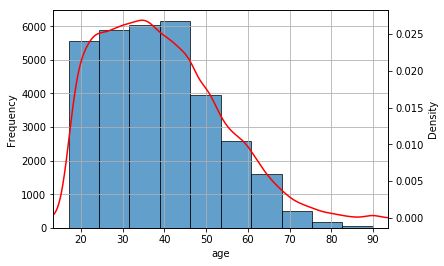

,counts,density
age,,
"1_[17,24.3]",5570,0.0234
"2_[24.3,31.6]",5890,0.0248
"3_[31.6,38.9]",6048,0.0254
"4_[38.9,46.2]",6163,0.0259
"5_[46.2,53.5]",3967,0.0167
"6_[53.5,60.8]",2591,0.0109
"7_[60.8,68.1]",1595,0.00671
"8_[68.1,75.4]",496,0.00209
"9_[75.4,82.7]",174,0.000732


In [11]:
sourceVariable='age'
table = mltk.histogram(Data, variable=sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

# 4. Creating Feature Variables <a class="anchor" id="features"></a>
[^](#toc) 

## 4.1 Inspect Categorical Variables

In [12]:
categoryVariables = set({'sex', 'race', 'occupation', 'workclass', 'maritalstatus', 'relationship'})
binaryVariables = set({})
print(mltk.category_lists(Data, list(categoryVariables)))

{
    "workclass": [
        "?",
        "Private",
        "State-gov",
        "Federal-gov",
        "Self-emp-not-inc",
        "Self-emp-inc",
        "Local-gov",
        "Without-pay",
        "Never-worked"
    ],
    "maritalstatus": [
        "Widowed",
        "Divorced",
        "Separated",
        "Never-married",
        "Married-civ-spouse",
        "Married-spouse-absent",
        "Married-AF-spouse"
    ],
    "relationship": [
        "Not-in-family",
        "Unmarried",
        "Own-child",
        "Other-relative",
        "Husband",
        "Wife"
    ],
    "sex": [
        "Female",
        "Male"
    ],
    "race": [
        "White",
        "Black",
        "Asian-Pac-Islander",
        "Other",
        "Amer-Indian-Eskimo"
    ],
    "occupation": [
        "?",
        "Exec-managerial",
        "Machine-op-inspct",
        "Prof-specialty",
        "Other-service",
        "Adm-clerical",
        "Craft-repair",
        "Transport-moving",
        "Handle

## 4.2 Tranform Variables

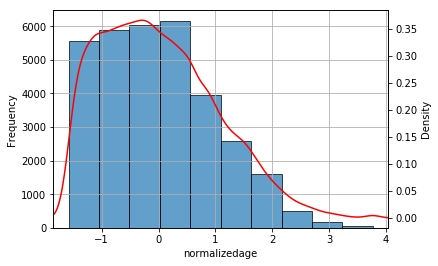

,counts,density
normalizedage,,
"1_[-1.58218,-1.04701]",5570,0.32
"2_[-1.04701,-0.511835]",5890,0.338
"3_[-0.511835,0.0233389]",6048,0.347
"4_[0.0233389,0.558513]",6163,0.354
"5_[0.558513,1.09369]",3967,0.228
"6_[1.09369,1.62886]",2591,0.149
"7_[1.62886,2.16403]",1595,0.0915
"8_[2.16403,2.69921]",496,0.0285
"9_[2.69921,3.23438]",174,0.00999


In [13]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'age', 
        'destination':'normalizedage'
    },
    "parameters":{"method":"zscore"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

## 4.3 Merge Categories

In [14]:
rule_set = {
    'operation':'catmerge',
    'variables': {
        'source':'maritalstatus', 
        'destination':'maritalstatus'
    },     
    'parameters': { 
            'group_value':'Married',
            'values':["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"],
            'case': True
    }
} 

Data, mergedVariable = mltk.merge_categories_task(Data, rule_set, return_variable=True)
table = mltk.variable_frequency(Data, variable=mergedVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married,15417,47.3
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


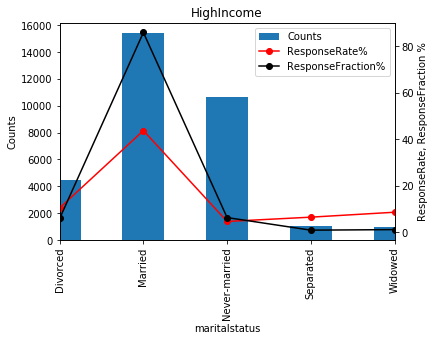

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
maritalstatus,,,,,
Divorced,4443,463,13.64516,5.90486,10.42089
Married,15417,6736,47.34805,85.90741,43.69203
Never-married,10683,491,32.80919,6.26196,4.59609
Separated,1025,66,3.14794,0.84173,6.43902
Widowed,993,85,3.04966,1.08405,8.55992
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [15]:
mltk.variable_response(DataFrame=Data, variable=mergedVariable, target_variable=targetVariable, show_plot=True)

## 4.4 Group Countries into Entities

In [16]:
rule_set = {
    'operation':'dictionary', 
    'variables': {
        'source':'nativecountry', 
        'destination':'nativecountryGRP'
    },
    'parameters': {    
        'match_type': None, # values|pattern|mix
        "dictionary": [
            {
                    "entity":"USA",
                    "values":["United-States"],
                    'case': True
            },
            {
                    "entity":"Canada",
                    "values":["Canada"],
                    'case': True
            },
            { 
                    "entity":"OtherAmericas",  
                    "values":["South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                    'case': True
            },
            {
                    "entity":"Europe-Med",
                    "values":["Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal"],
                    'case': True
            },
            {
                    "entity":"Asia",
                    "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand"],
                    'case': True
            },
            {
                    "entity":"Other",
                    "values": ["?"],
                    'case': True
            }
        ],
        "null":"NA",
        "default":"OTHER"
    }  
}

Data, entityVariable = mltk.create_entity_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(entityVariable)
table = mltk.variable_frequency(Data, variable=entityVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountryGRP,,
Asia,628,1.93
Canada,121,0.372
Europe-Med,564,1.73
Other,583,1.79
OtherAmericas,1495,4.59
USA,29170,89.6
TOTAL,32561,100


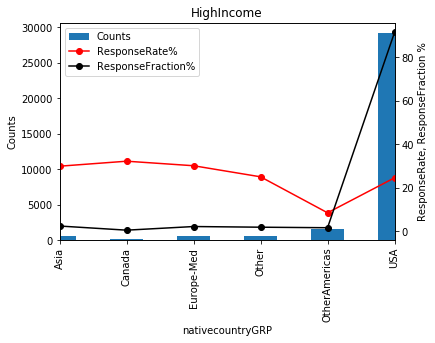

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
nativecountryGRP,,,,,
Asia,628,188,1.92869,2.39765,29.93631
Canada,121,39,0.37161,0.49739,32.23140
Europe-Med,564,170,1.73213,2.16809,30.14184
Other,583,146,1.79049,1.86201,25.04288
OtherAmericas,1495,127,4.59138,1.61969,8.49498
USA,29170,7171,89.58570,91.45517,24.58348
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [17]:
mltk.variable_response(DataFrame=Data, variable=entityVariable, target_variable=targetVariable, show_plot=True)

## 4.4 Response Rate For Categorical Variables

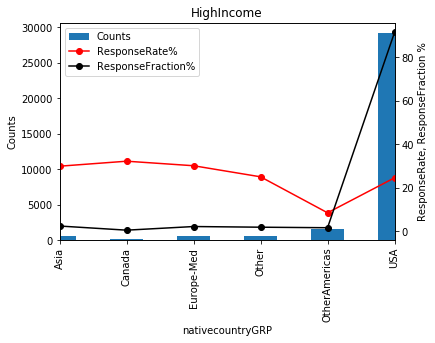

                  Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
nativecountryGRP                                                                       
Asia                 628         188          1.92869            2.39765       29.93631
Canada               121          39          0.37161            0.49739       32.23140
Europe-Med           564         170          1.73213            2.16809       30.14184
Other                583         146          1.79049            1.86201       25.04288
OtherAmericas       1495         127          4.59138            1.61969        8.49498
USA                29170        7171         89.58570           91.45517       24.58348
TOTAL              32561        7841        100.00000          100.00000       24.08096


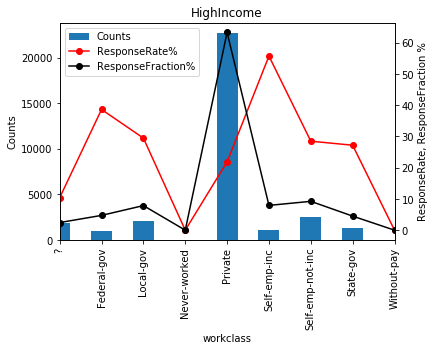

                  Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
workclass                                                                              
?                   1836         191          5.63865            2.43591       10.40305
Federal-gov          960         371          2.94831            4.73154       38.64583
Local-gov           2093         617          6.42794            7.86889       29.47922
Never-worked           7           0          0.02150            0.00000        0.00000
Private            22696        4963         69.70302           63.29550       21.86729
Self-emp-inc        1116         622          3.42741            7.93266       55.73477
Self-emp-not-inc    2541         724          7.80381            9.23352       28.49272
State-gov           1298         353          3.98636            4.50198       27.19569
Without-pay           14           0          0.04300            0.00000        0.00000
TOTAL              32561        

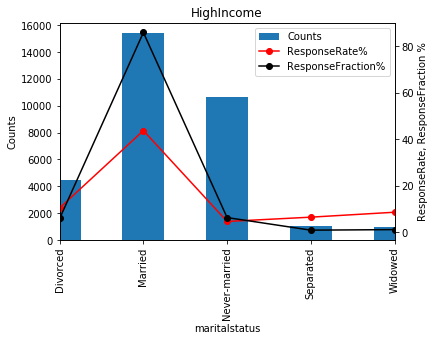

               Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
maritalstatus                                                                       
Divorced         4443         463         13.64516            5.90486       10.42089
Married         15417        6736         47.34805           85.90741       43.69203
Never-married   10683         491         32.80919            6.26196        4.59609
Separated        1025          66          3.14794            0.84173        6.43902
Widowed           993          85          3.04966            1.08405        8.55992
TOTAL           32561        7841        100.00000          100.00000       24.08096


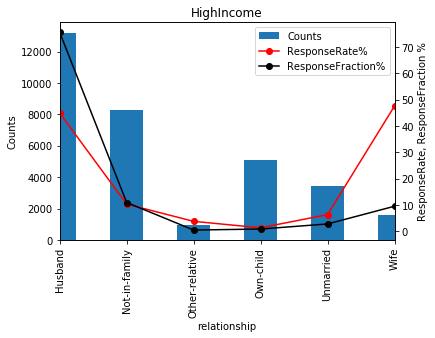

                Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
relationship                                                                         
Husband          13193        5918         40.51780           75.47507       44.85712
Not-in-family     8305         856         25.50597           10.91697       10.30704
Other-relative     981          37          3.01281            0.47188        3.77166
Own-child         5068          67         15.56463            0.85448        1.32202
Unmarried         3446         218         10.58321            2.78026        6.32618
Wife              1568         745          4.81558            9.50134       47.51276
TOTAL            32561        7841        100.00000          100.00000       24.08096


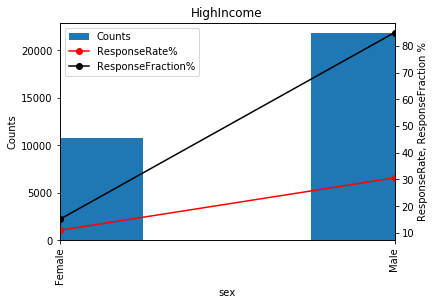

        Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
sex                                                                          
Female   10771        1179         33.07945           15.03635       10.94606
Male     21790        6662         66.92055           84.96365       30.57366
TOTAL    32561        7841        100.00000          100.00000       24.08096


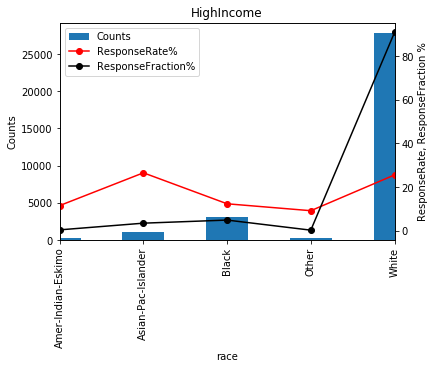

                    Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
race                                                                                     
Amer-Indian-Eskimo     311          36          0.95513            0.45913       11.57556
Asian-Pac-Islander    1039         276          3.19093            3.51996       26.56400
Black                 3124         387          9.59430            4.93559       12.38796
Other                  271          25          0.83228            0.31884        9.22509
White                27816        7117         85.42735           90.76648       25.58599
TOTAL                32561        7841        100.00000          100.00000       24.08096


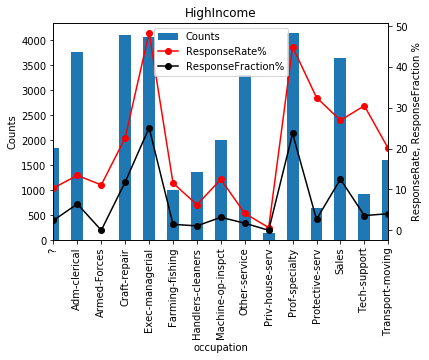

                   Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
occupation                                                                              
?                    1843         191          5.66015            2.43591       10.36354
Adm-clerical         3770         507         11.57827            6.46601       13.44828
Armed-Forces            9           1          0.02764            0.01275       11.11111
Craft-repair         4099         929         12.58868           11.84798       22.66406
Exec-managerial      4066        1968         12.48733           25.09884       48.40138
Farming-fishing       994         115          3.05273            1.46665       11.56942
Handlers-cleaners    1370          86          4.20749            1.09680        6.27737
Machine-op-inspct    2002         250          6.14846            3.18837       12.48751
Other-service        3295         137         10.11947            1.74723        4.15781
Priv-house-serv      

In [18]:
mltk.variable_responses(Data, variables=categoryVariables, target_variable=targetVariable, show_output=True, show_plot=True)

## 4.5 Create Categorical Variables from continious variables

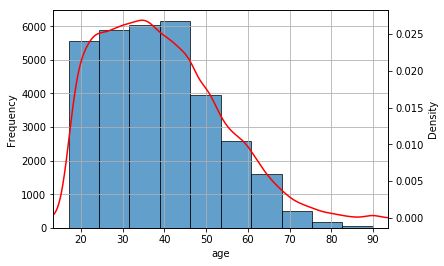

               counts  density
age                           
1_[17,24.3]      5570  0.02343
2_[24.3,31.6]    5890  0.02478
3_[31.6,38.9]    6048  0.02544
4_[38.9,46.2]    6163  0.02593
5_[46.2,53.5]    3967  0.01669
6_[53.5,60.8]    2591  0.01090
7_[60.8,68.1]    1595  0.00671
8_[68.1,75.4]     496  0.00209
9_[75.4,82.7]     174  0.00073
10_[82.7,90]       67  0.00028
TOTAL           32561      NaN


In [19]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)
print(table)

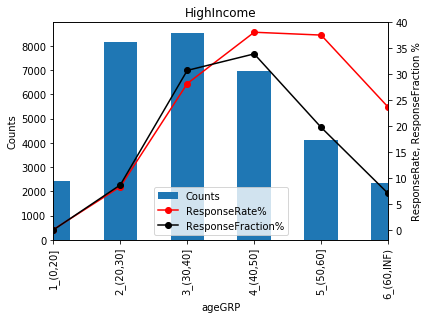

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
ageGRP,,,,,
"1_(0,20]",2410,2,7.40149,0.02551,0.08299
"2_(20,30]",8162,680,25.06680,8.67236,8.33129
"3_(30,40]",8546,2406,26.24612,30.68486,28.15352
"4_(40,50]",6983,2655,21.44590,33.86048,38.02091
"5_(50,60]",4128,1547,12.67774,19.72963,37.47578
"6_(60,INF)",2332,551,7.16194,7.02716,23.62779
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [20]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'age', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '20', '30', '40', '50', '60', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

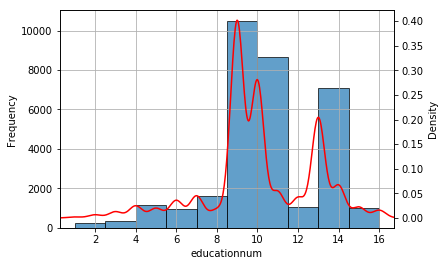

,counts,density
educationnum,,
"1_[1,2.5]",219,0.00448
"2_[2.5,4]",333,0.00682
"3_[4,5.5]",1160,0.02375
"4_[5.5,7]",933,0.01910
"5_[7,8.5]",1608,0.03292
"6_[8.5,10]",10501,0.21500
"7_[10,11.5]",8673,0.17757
"8_[11.5,13]",1067,0.02185
"9_[13,14.5]",7078,0.14492


In [21]:
sourceVariable='educationnum'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)

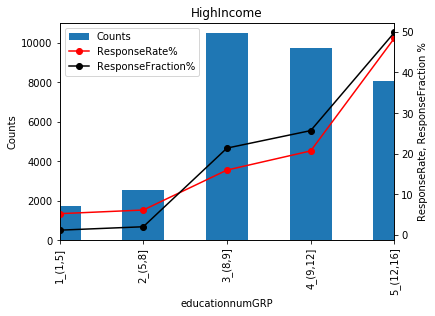

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
educationnumGRP,,,,,
"1_(1,5]",1712,89,5.25782,1.13506,5.19860
"2_(5,8]",2541,155,7.80381,1.97679,6.09996
"3_(8,9]",10501,1675,32.25024,21.36207,15.95086
"4_(9,12]",9740,2013,29.91309,25.67275,20.66735
"5_(12,16]",8067,3909,24.77504,49.85334,48.45668
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [22]:
rule_set = {
    'operation':'bucket',
    'variables': {
        'source':'educationnum', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['1', '5', '8', '9', '12', '16'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

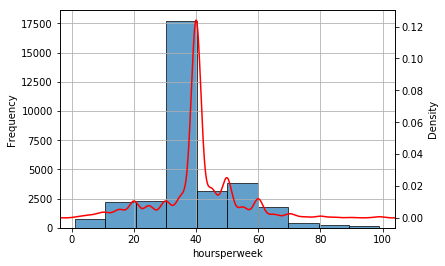

,counts,density
hoursperweek,,
"1_[1,10.8]",736,0.00231
"2_[10.8,20.6]",2192,0.00687
"3_[20.6,30.4]",2317,0.00726
"4_[30.4,40.2]",17735,0.05558
"5_[40.2,50]",3119,0.00977
"6_[50,59.8]",3877,0.01215
"7_[59.8,69.6]",1796,0.00563
"8_[69.6,79.4]",448,0.00140
"9_[79.4,89.2]",202,0.00063


In [23]:
sourceVariable='hoursperweek'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)

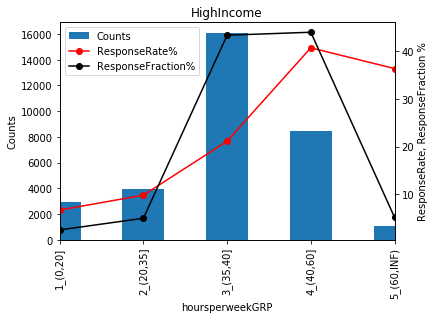

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
hoursperweekGRP,,,,,
"1_(0,20]",2928,195,8.99235,2.48693,6.65984
"2_(20,35]",3952,387,12.13722,4.93559,9.79251
"3_(35,40]",16100,3403,49.44566,43.40008,21.13665
"4_(40,60]",8471,3452,26.01579,44.02500,40.75080
"5_(60,INF)",1110,404,3.40899,5.15240,36.39640
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [24]:
rule_set = {
    'operation':'bucket',
    'variables': {
        'source':'hoursperweek', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '20', '35', '40', '60', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}

Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

#### Usage Example:  String Similarity

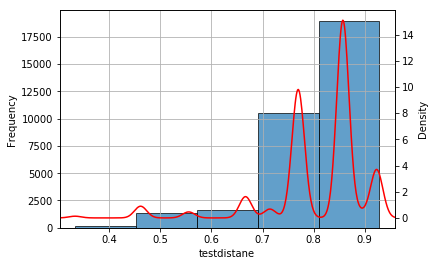

,counts,density
testdistane,,
"1_[0.333333,0.452381]",130,0.03354
"2_[0.452381,0.571429]",1332,0.34363
"3_[0.571429,0.690476]",1601,0.41302
"4_[0.690476,0.809524]",10538,2.71857
"5_[0.809524,0.928571]",18960,4.89125
TOTAL,32561,NaN


In [25]:
rule_set = {
    'type':'comparison_str',
    'include': False,    
    'variables': {
        "source1":"maritalstatus", 
        "source2":"relationship",  
        'destination':'testdistane'
    },     
    'operation':'levenshtein', 
    'parameters':{
        'case_sensitive':True,
        'normalize':True
    }
}

Data, string_comparison_variable = mltk.create_str_comparison_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_comparison_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

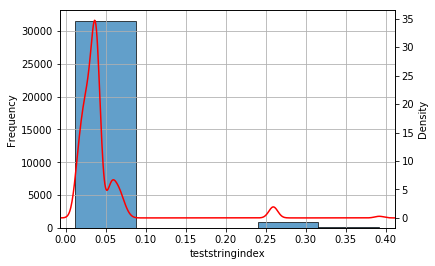

,counts,density
teststringindex,,
"1_[0.0114943,0.0876268]",31550,12.72716
"2_[0.0876268,0.163759]",0,0.00000
"3_[0.163759,0.239892]",0,0.00000
"4_[0.239892,0.316024]",881,0.35539
"5_[0.316024,0.392157]",130,0.05244
TOTAL,32561,NaN


In [26]:
rule_set = {
    'type':'comparison_str',
    'include': True,
    'variables': {
        'source1':'maritalstatus', 
        'source2':'relationship', 
        'destination':'teststringindex'
    },
    'operation':'jaccard',  
    'parameters':{
        'case_sensitive':True, 
        'min_length':1, 
        'max_length':4000, 
    }
}

Data, string_comparison_variable = mltk.create_str_comparison_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_comparison_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

#### Usage Example: String Pattern Count

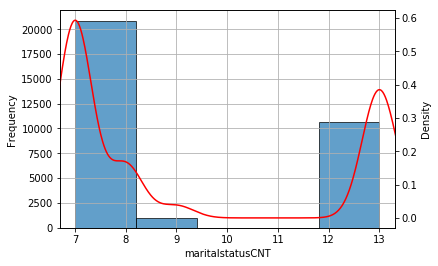

,counts,density
maritalstatusCNT,,
"1_[7,8.2]",20853,0.53369
"2_[8.2,9.4]",1025,0.02623
"3_[9.4,10.6]",0,0.00000
"4_[10.6,11.8]",0,0.00000
"5_[11.8,13]",10683,0.27341
TOTAL,32561,NaN


In [27]:
rule_set = {
    'type': 'transform_str',
    'variables': {
        'source':'maritalstatus', 
        'destination':'maritalstatusCNT'
    },  
    'operation':'strcount',  
    'include': True,
    'parameters':{
        'pattern':'*',
        'case_sensitive':True
    }
}

Data, string_transform_variable = mltk.create_str_transformed_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_transform_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
maritalstatus,,,,,,,
Divorced,0,2404,110,328,1601,0,4443
Married,13193,228,157,141,130,1568,15417
Never-married,0,4706,611,4485,881,0,10683
Separated,0,420,55,99,451,0,1025
Widowed,0,547,48,15,383,0,993
All,13193,8305,981,5068,3446,1568,32561


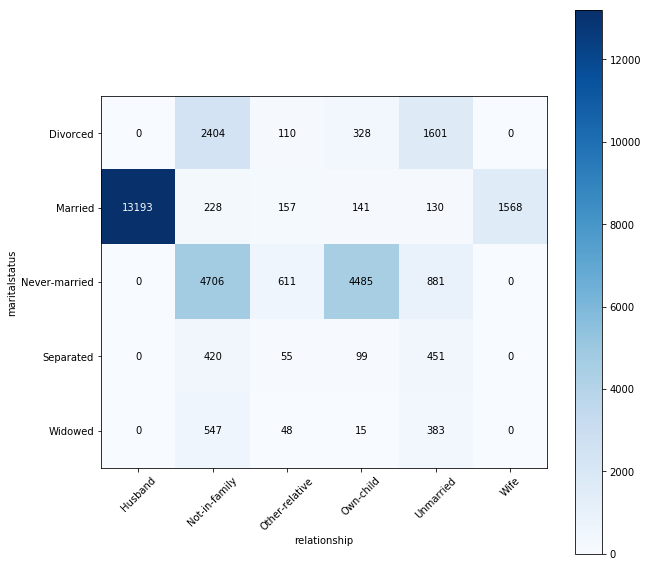

In [28]:
table = mltk.crosstab(Data, 'maritalstatus', 'relationship', margins=True, normalize_axis=None , show_plot=True)
table

# 5. Create Modeling dataset <a class="anchor" id="input"></a>

### Feature/Predictor variables (X) and Response variable (y)
[^](#toc) 

## 5.1 Variables setup

In [29]:
identifierColumns = ['ID']
categoryVariables=list(categoryVariables)
binaryVariables=list(binaryVariables)
targetVariable = targetVariable
modelDataStats = mltk.data_description(Data)
modelDataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,5,Married,15417,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


In [30]:
Data[identifierColumns+binaryVariables+categoryVariables+[targetVariable]].sample(5).transpose()
#mltk.plot_variable_responses(Data, variables=categoryVariables+binaryVariables, target_variable=targetVariable)

,19225,31541,22998,24756,9614
ID,19226,31542,22999,24757,9615
educationnumGRP,"5_(12,16]","3_(8,9]","5_(12,16]","3_(8,9]","3_(8,9]"
maritalstatus,Never-married,Married,Divorced,Never-married,Married
race,White,White,White,Other,White
occupation,Exec-managerial,Other-service,Sales,?,Prof-specialty
hoursperweekGRP,"3_(35,40]","4_(40,60]","4_(40,60]","3_(35,40]","3_(35,40]"
workclass,Self-emp-inc,Private,Private,?,Private
relationship,Own-child,Husband,Not-in-family,Own-child,Wife
sex,Female,Male,Male,Female,Female
nativecountryGRP,USA,USA,USA,USA,USA


## 5.2 Create One Hot Encoded Variables

In [31]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,21931,23272,15735,29605,980
ID,21932,23273,15736,29606,981
"educationnumGRP_1_(1,5]",0,1,0,0,0
"educationnumGRP_2_(5,8]",0,0,0,0,0
"educationnumGRP_3_(8,9]",0,0,0,1,0
"educationnumGRP_4_(9,12]",0,0,0,0,0
"educationnumGRP_5_(12,16]",1,0,1,0,1
maritalstatus_Divorced,0,0,0,0,0
maritalstatus_Married,1,1,1,1,1
maritalstatus_Never-married,0,0,0,0,0
maritalstatus_Separated,0,0,0,0,0


## 5.3 Analyze Correlation

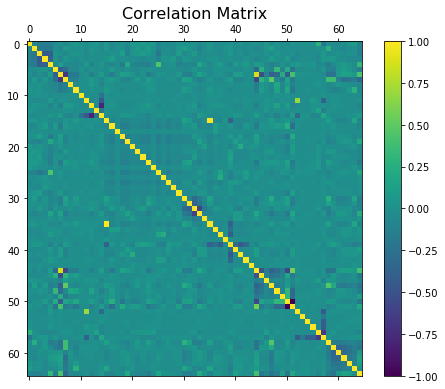

,Variable1,Variable2,Correlation,|Correlation|,corrTargetVariable1,corrTargetVariable2
1925,sex_Female,sex_Male,-1,1,-0.216,0.216
859,occupation_?,workclass_?,0.998,0.998,-0.0786,-0.0782
400,maritalstatus_Married,relationship_Husband,0.87,0.87,0.435,0.401
691,race_Black,race_White,-0.789,0.789,-0.0891,0.0852
678,race_Asian-Pac-Islander,nativecountryGRP_Asia,0.694,0.694,0.0105,0.0192
363,maritalstatus_Married,maritalstatus_Never-married,-0.663,0.663,0.435,-0.318
1988,nativecountryGRP_OtherAmericas,nativecountryGRP_USA,-0.643,0.643,-0.08,0.0345
1520,"hoursperweekGRP_3_(35,40]","hoursperweekGRP_4_(40,60]",-0.586,0.586,-0.0681,0.231
1832,relationship_Husband,sex_Male,0.58,0.58,0.401,0.216
1831,relationship_Husband,sex_Female,-0.58,0.58,0.401,-0.216


In [32]:
correlation=mltk.correlation_matrix(Data, featureVariables+[targetVariable], target_variable=targetVariable, method='pearson', return_type='list', show_plot=True)
correlation.head(10).style.background_gradient(cmap='RdYlGn').set_precision(3)

## Split data to train and test datasets

In [33]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.2,0.2))

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]


In [34]:
print(featureVariables)

['educationnumGRP_1_(1,5]', 'educationnumGRP_2_(5,8]', 'educationnumGRP_3_(8,9]', 'educationnumGRP_4_(9,12]', 'educationnumGRP_5_(12,16]', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Never-married', 'maritalstatus_Separated', 'maritalstatus_Widowed', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'hoursperweekGRP_1_(0,20]', 'hoursperweekGRP_2_(20,35]', 'hoursperweekGRP_3_(35,40]', 'hoursperweekGRP_4_(40,60]', 'hoursperweekGRP_5_(60,INF)', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workcl

# 6. Run classifier algorithms <a class="anchor" id="model"></a>
[^](#toc) 

## 6.1 Model Variables

In [35]:
# Run classifier algorithms
#model_variables = featureVariables

modelVariables = [
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
# 'race_White',
# 'occupation_?',
 'occupation_Adm-clerical',
# 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
# 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
# 'occupation_Transport-moving',
 'maritalstatus_Divorced',
 'maritalstatus_Married',
 'maritalstatus_Never-married',
# 'maritalstatus_Separated',
# 'maritalstatus_Widowed',
 'educationnumGRP_1_(1,5]',
 'educationnumGRP_2_(5,8]',
 'educationnumGRP_3_(8,9]',
 'educationnumGRP_4_(9,12]',
# 'educationnumGRP_5_(12,16]',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
# 'relationship_Wife',
# 'ageGRP_1_(0,20]',
 'ageGRP_2_(20,30]',
 'ageGRP_3_(30,40]',
 'ageGRP_4_(40,50]',
 'ageGRP_5_(50,60]',
# 'ageGRP_6_(60,INF)',
 'sex_Female',
# 'sex_Male',
 'nativecountryGRP_Asia',
 'nativecountryGRP_Canada',
 'nativecountryGRP_Europe-Med',
 'nativecountryGRP_Other',
 'nativecountryGRP_OtherAmericas',
# 'nativecountryGRP_USA',
# 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
# 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
# 'workclass_Without-pay',
 'hoursperweekGRP_1_(0,20]',
 'hoursperweekGRP_2_(20,35]',
 'hoursperweekGRP_3_(35,40]',
 'hoursperweekGRP_4_(40,60]',
# 'hoursperweekGRP_5_(60,INF)'
 ]

## 6.2 Model Setup

In [36]:
sample_attributes = {'SampleDescription':'Adult Census Income Dataset',
                    'NumClasses':2,
                    'ClassLabelsMap':{'<=50K':0, '>50K':1},
                     'DataFormat':'table', 
                    'RecordIdentifiers':identifierColumns,
                    'ModelDataStats':modelDataStats
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Percentiles':[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0],
                    'Threshold':0.5,
                   'Quantiles':10,
                    'TargetClass': '>50K',
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                   'PredictedLabel':'Predicted'
                   }

model_attributes = {
                    'ModelID': None,   
                    'ModelType':'classification',# 'regression'
                    'EnumerationType': 'binary', # 'multi' 'mono' None
                    'ModelName': 'IncomeLevel',
                    'Version':'0.1',
                    'TrainingMethod': 'supervised' 
                   }

## 6.3 Models

## 6.3.1 Logistic Regression

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20200212214333', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214333', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100, 'Verbose': True, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Optimization terminated successfully.
         Current function value: 0.343935
         Iterations 9


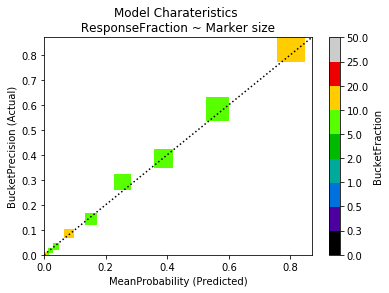

In [37]:
model_parameters = {'MLAlgorithm':'LGR', # 'RF', # 'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'MaxIterations':100,
                   'Verbose':True}  

LGRModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [38]:
print(LGRModel.model_attributes['ModelID'])
print(LGRModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', LGRModel.get_auc(curve='roc'))
print('PRC AUC: ', LGRModel.get_auc(curve='prc'))
#print(LGRModel.model_evaluation['RobustnessTable'])

INCOMELEVELLGR20200212214333
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19489
Method:                           MLE   Df Model:                           46
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.3763
Time:                        21:43:34   Log-Likelihood:                -6719.1
converged:                       True   LL-Null:                       -10773.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
race_Amer-Indian-Eskimo           -0.5794      0.271     -2.141      0.032      -1.110      -0.049
race_Asian-Pac-Islander            0.0795 

In [39]:
LGRModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0002,0.0048,0.0027,659,4,0.101,0.0026,0.0061,1,1,0.24
2,0.0048,0.0118,0.008,646,5,0.0992,0.0032,0.0077,0.899,0.997,0.266
3,0.0118,0.0251,0.0181,649,13,0.0996,0.0083,0.02,0.8,0.994,0.298
4,0.0251,0.0533,0.0376,651,23,0.1,0.0147,0.0353,0.7,0.986,0.338
5,0.0533,0.111,0.0801,652,57,0.1,0.0365,0.0874,0.6,0.971,0.388
6,0.112,0.199,0.152,651,94,0.1,0.0602,0.144,0.5,0.935,0.448
7,0.199,0.309,0.252,651,191,0.1,0.122,0.293,0.4,0.874,0.524
8,0.309,0.461,0.385,651,253,0.1,0.162,0.389,0.3,0.752,0.601
9,0.462,0.677,0.561,651,381,0.1,0.244,0.585,0.2,0.59,0.707


## 6.3.2 Random Forest Classifier

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELRF20200212214334', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214334', 'ModelFitTime': -1}
{'MLAlgorithm': 'RF', 'Verbose': True, 'NTrees': 500, 'MaxDepth': 50, 'MinSamplesToSplit': 10, 'Processors': 2, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Probability_0
Probability_1


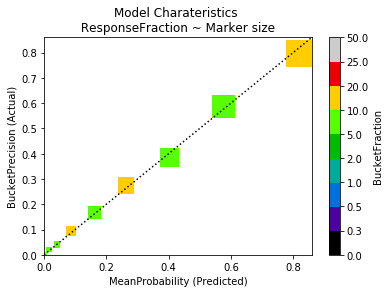

In [40]:
model_parameters = {'MLAlgorithm':'RF', # 'LGR', #  'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'Verbose':False,
                    'NTrees':500,
                   'MaxDepth':50,
                   'MinSamplesToSplit':10,
                   'Processors':2,
                   'Verbose':True} 

RFModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [41]:
print(RFModel.model_attributes['ModelID'])
print(RFModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', RFModel.get_auc(curve='roc'))
print('PRC AUC: ', RFModel.get_auc(curve='prc'))
#print(RFModel.model_evaluation['RobustnessTable'])

INCOMELEVELRF20200212214334
                          Features  Importances    stdev
16           maritalstatus_Married      0.12758  0.11510
22            relationship_Husband      0.09337  0.10358
6       occupation_Exec-managerial      0.05227  0.01985
17     maritalstatus_Never-married      0.05053  0.06704
11       occupation_Prof-specialty      0.04867  0.01694
20         educationnumGRP_3_(8,9]      0.04279  0.00918
46       hoursperweekGRP_4_(40,60]      0.03738  0.02243
27                ageGRP_2_(20,30]      0.03343  0.01733
21        educationnumGRP_4_(9,12]      0.03060  0.00572
18         educationnumGRP_1_(1,5]      0.02971  0.01058
23      relationship_Not-in-family      0.02466  0.02516
31                      sex_Female      0.02435  0.02106
25          relationship_Own-child      0.02288  0.03268
29                ageGRP_4_(40,50]      0.02226  0.00959
19         educationnumGRP_2_(5,8]      0.02163  0.00728
41      workclass_Self-emp-not-inc      0.01814  0.00374
39 

In [42]:
RFModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.0005,0.0001,654,4,0.1,0.0026,0.0061,1,1,0.24
2,0.0005,0.0071,0.0032,649,5,0.0996,0.0032,0.0077,0.9,0.997,0.266
3,0.0071,0.024,0.0142,651,15,0.1,0.0096,0.023,0.8,0.994,0.298
4,0.024,0.0598,0.0401,651,27,0.1,0.0173,0.0415,0.7,0.985,0.337
5,0.0598,0.115,0.0851,652,62,0.1,0.0397,0.0951,0.6,0.967,0.386
6,0.115,0.21,0.162,651,111,0.1,0.0711,0.171,0.5,0.928,0.445
7,0.211,0.316,0.262,652,180,0.1,0.115,0.276,0.4,0.857,0.513
8,0.317,0.474,0.4,650,252,0.0998,0.161,0.388,0.3,0.741,0.592
9,0.474,0.688,0.575,651,384,0.1,0.246,0.59,0.2,0.58,0.695


## 6.3.3 Deep Feed Forward Neural Network

In [43]:
inputShape = (len(modelVariables),)

architecture = {'layers': [
        {'name': 'Dense1', 'class_name': 'Dense', 'position':'input', 'config':{'units': 512, 'activation':'relu', 'input_shape':inputShape}},
        {'name': 'Dense2', 'class_name': 'Dense', 'position':'hidden', 'config':{'units': 512, 'activation':'relu', 'kernel_regularizer':{'l1':0.01}}},
        {'name': 'Dropout1', 'class_name': 'Dropout', 'position':'hidden', 'config':{'rate':0.5, 'noise_shape':None, 'seed':None}},
        {'name': 'Dense3', 'class_name': 'Dense', 'position':'output',  'config':{'units': 2, 'activation':'softmax'}}
       ]}

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELNN20200212214341', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214341', 'ModelFitTime': -1}
{'MLAlgorithm': 'NN', 'BatchSize': 512, 'InputShape': (47,), 'NumClasses': 2, 'Epochs': 10, 'EvalMatrics': ['accuracy'], 'Architecture': {'layers': [{'name': 'Dense1', 'class_name': 'Dense', 'position': 'input', 'config': {'units': 512, 'activation': 'relu', 'input_shape': (47,)}}, {'name': 'Dense2', 'class_name': 'Dense', 'position': 'hidden', 'config': {'units': 512, 'activation': 'relu', 'kernel_regularizer': {'l1': 0.01}}}, {'name': 'Dropout1', 'class_name': 'Dropout', 'position': 'hidden', 'config': {'rate': 0.5, 'noise_shape': None, 'seed': None}}, {'name': 'Dense3', 'class_name': 'Dense', 'position': 'output', 'config': {'units': 2, 'acti

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 512)               24576     
_________________________________________________________________
Dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
Dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dense3 (Dense)               (None, 2)                 1026      
Total params: 288,258
Trainable params: 288,258
Non-trainable params: 0
_________________________________________________________________
Train on 19536 samples, validate on 6512 samples
Instructions for updating:
Use t

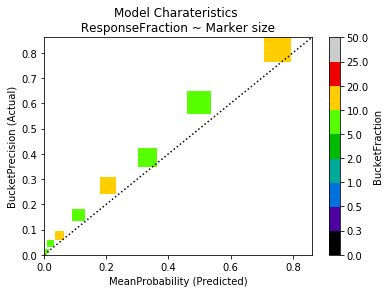

In [44]:
model_parameters = {'MLAlgorithm':'NN',
                    'BatchSize':512,
                   'InputShape':inputShape,
                   'NumClasses':2,
                   'Epochs':10,
                   'EvalMatrics':['accuracy'],
                   'Architecture':architecture,
                   'Verbose':True} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [45]:
print(NNModel.model_attributes['ModelID'])
print(NNModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', NNModel.get_auc(curve='roc'))
print('PRC AUC: ', NNModel.get_auc(curve='prc'))
#print(NNModel.model_evaluation['RobustnessTable'])

INCOMELEVELNN20200212214341
      loss      acc  val_loss  val_acc
0  0.40583  0.80513   0.40081  0.80390
1  0.35701  0.82965   0.36900  0.82279
2  0.34993  0.83344   0.35997  0.82709
3  0.34569  0.83502   0.35809  0.82709
4  0.34231  0.83948   0.36619  0.83093
5  0.34217  0.83881   0.37328  0.82049
6  0.33872  0.83963   0.36052  0.82862
7  0.33733  0.84137   0.36651  0.82202
8  0.33733  0.84040   0.35720  0.82816
9  0.33617  0.84357   0.36755  0.82816
ROC AUC:  0.8920857399517107
PRC AUC:  0.713839066948984


In [46]:
NNModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.0016,0.0009,652,2,0.1,0.0013,0.0031,1,1,0.24
2,0.0016,0.0047,0.003,651,4,0.1,0.0026,0.0061,0.9,0.999,0.266
3,0.0047,0.0119,0.0079,651,11,0.1,0.007,0.0169,0.8,0.996,0.298
4,0.0119,0.0285,0.0187,651,30,0.1,0.0192,0.0461,0.7,0.989,0.339
5,0.0286,0.0728,0.0478,652,51,0.1,0.0327,0.0782,0.6,0.97,0.387
6,0.0733,0.151,0.109,651,104,0.1,0.0666,0.16,0.5,0.937,0.449
7,0.151,0.263,0.205,655,181,0.101,0.116,0.276,0.4,0.871,0.522
8,0.264,0.399,0.331,648,250,0.0995,0.16,0.386,0.299,0.755,0.604
9,0.399,0.614,0.496,650,393,0.0998,0.252,0.605,0.2,0.595,0.713


### 6.4 CatBoost

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELCBST20200212214409', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214409', 'ModelFitTime': -1}
{'MLAlgorithm': 'CBST', 'NTrees': 500, 'MaxDepth': 10, 'LearningRate': 0.7, 'LossFunction': 'Logloss', 'EvalMatrics': 'Accuracy', 'Imbalanced': False, 'TaskType': 'GPU', 'Processors': 2, 'UseBestModel': True, 'Verbose': True, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


0:	learn: 0.8288288	test: 0.8183354	best: 0.8183354 (0)	total: 290ms	remaining: 2m 24s
50:	learn: 0.8525287	test: 0.8264742	best: 0.8309275 (13)	total: 5.24s	remaining: 46.2s
100:	learn: 0.8559582	test: 0.8253993	best: 0.8309275 (13)	total: 9.24s	remaining: 36.5s
150:	learn: 0.8568796	test: 0.8270885	best: 0.8309275 (13)	total: 12.2s	remaining: 28.2s
200:	learn: 0.8573915	test: 0.8270885	best: 0.8309275 (13)	total: 15.3s	remaining: 22.8s
250:	learn: 0.8582617	test: 0.8252457	best: 0.8309275 (13)	total: 18.9s	remaining: 18.7s
300:	learn: 0.8607187	test: 0.8210995	best: 0.8309275 (13)	total: 22.6s	remaining: 15s
350:	learn: 0.8607187	test: 0.8221744	best: 0.8309275 (13)	total: 25.9s	remaining: 11s
400:	learn: 0.8605651	test: 0.8217138	best: 0.8309275 (13)	total: 28.8s	remaining: 7.12s
450:	learn: 0.8610770	test: 0.8227887	best: 0.8309275 (13)	total: 31.8s	remaining: 3.45s
499:	learn: 0.8609234	test: 0.8230958	best: 0.8309275 (13)	total: 34.7s	remaining: 0us
bestTest = 0.8309275184
bestIt

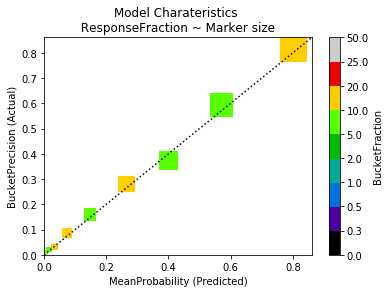

In [47]:
model_parameters = {'MLAlgorithm':'CBST',
                    'NTrees': 500,
                    'MaxDepth':10,
                    'LearningRate':0.7,
                    'LossFunction':'Logloss',#crossEntropy
                    'EvalMatrics':'Accuracy',
                    'Imbalanced':False,
                    'TaskType':'GPU',
                    'Processors':2,
                    'UseBestModel':True,
                    'Verbose':True}

CBSTModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [48]:
print(CBSTModel.model_attributes['ModelID'])
print(CBSTModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', CBSTModel.get_auc(curve='roc'))
print('PRC AUC: ', CBSTModel.get_auc(curve='prc'))
#print(CBSTModel.model_evaluation['RobustnessTable'])

INCOMELEVELCBST20200212214409
                          Features  Importances
16           maritalstatus_Married     35.05471
18         educationnumGRP_1_(1,5]      5.97238
27                ageGRP_2_(20,30]      5.95503
23      relationship_Not-in-family      5.53403
19         educationnumGRP_2_(5,8]      5.28191
20         educationnumGRP_3_(8,9]      4.44906
21        educationnumGRP_4_(9,12]      3.88695
26          relationship_Unmarried      2.73511
10        occupation_Other-service      2.64971
6       occupation_Exec-managerial      2.29747
45       hoursperweekGRP_3_(35,40]      2.23193
46       hoursperweekGRP_4_(40,60]      2.10417
31                      sex_Female      2.03645
11       occupation_Prof-specialty      1.93459
36  nativecountryGRP_OtherAmericas      1.73299
41      workclass_Self-emp-not-inc      1.62943
22            relationship_Husband      1.35345
17     maritalstatus_Never-married      1.17035
8     occupation_Handlers-cleaners      1.03931
29        

In [49]:
CBSTModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.0031,0.0015,654,3,0.1,0.0019,0.0046,1,1,0.24
2,0.0031,0.0093,0.0058,649,8,0.0996,0.0051,0.0123,0.9,0.998,0.266
3,0.0093,0.0205,0.0141,651,15,0.1,0.0096,0.023,0.8,0.993,0.297
4,0.0205,0.0481,0.0321,652,22,0.1,0.0141,0.0337,0.7,0.983,0.337
5,0.0483,0.102,0.0724,654,58,0.1,0.0372,0.0887,0.6,0.969,0.387
6,0.102,0.199,0.147,648,105,0.0995,0.0673,0.162,0.499,0.932,0.447
7,0.199,0.331,0.264,656,185,0.101,0.118,0.282,0.4,0.865,0.518
8,0.331,0.478,0.398,649,244,0.0996,0.156,0.376,0.299,0.746,0.598
9,0.478,0.681,0.57,648,386,0.0995,0.247,0.596,0.2,0.59,0.709


### 6.5 LightGBM

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGBM20200212214447', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214447', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGBM', 'NTrees': 500, 'MaxDepth': 10, 'LearningRate': 0.7, 'LossFunction': 'binary', 'EvalMatrics': 'logloss', 'EarlyStopAttempts': 5, 'SamplesRatioPerTree': 1.0, 'FeaturesRatioPerTree': 1.0, 'Regularization': {'L1': 0.0, 'L2': 0.001}, 'Processors': 2, 'Verbose': True, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
[1]	valid_

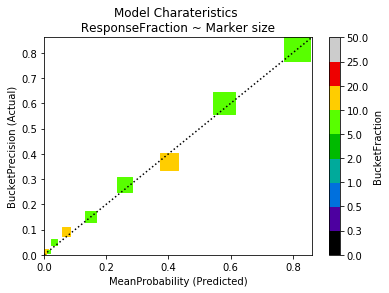

In [50]:
model_parameters = {'MLAlgorithm':'LGBM',
                    'NTrees': 500,
                    'MaxDepth':10,
                    'LearningRate':0.7,
                    'LossFunction':'binary',#crossEntropy
                    'EvalMatrics':'logloss',
                    'EarlyStopAttempts':5,
                    'SamplesRatioPerTree': 1.0,
                    'FeaturesRatioPerTree': 1.0,
                    'Regularization':{'L1':0.0, 'L2':0.001},
                    'Processors':2,
                    'Verbose':True}

LGBMModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [51]:
print(LGBMModel.model_attributes['ModelID'])
print(LGBMModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', LGBMModel.get_auc(curve='roc'))
print('PRC AUC: ', LGBMModel.get_auc(curve='prc'))
#print(CBSTModel.model_evaluation['RobustnessTable'])

INCOMELEVELLGBM20200212214447
                          Features  Importances
31                      sex_Female           19
21        educationnumGRP_4_(9,12]           17
20         educationnumGRP_3_(8,9]           17
16           maritalstatus_Married           15
46       hoursperweekGRP_4_(40,60]           14
41      workclass_Self-emp-not-inc           12
13                occupation_Sales           10
29                ageGRP_4_(40,50]           10
17     maritalstatus_Never-married           10
11       occupation_Prof-specialty           10
45       hoursperweekGRP_3_(35,40]            9
28                ageGRP_3_(30,40]            9
27                ageGRP_2_(20,30]            9
23      relationship_Not-in-family            9
39               workclass_Private            8
19         educationnumGRP_2_(5,8]            8
2                       race_Black            7
18         educationnumGRP_1_(1,5]            7
44       hoursperweekGRP_2_(20,35]            7
25        

In [52]:
LGBMModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0007,0.0034,0.0019,652,3,0.1,0.0019,0.0046,1,1,0.24
2,0.0034,0.0098,0.006,653,10,0.1,0.0064,0.0153,0.9,0.998,0.266
3,0.0099,0.0217,0.0146,650,8,0.0998,0.0051,0.0123,0.8,0.992,0.297
4,0.0218,0.045,0.0314,650,33,0.0998,0.0211,0.0508,0.7,0.987,0.338
5,0.0451,0.101,0.0706,652,60,0.1,0.0384,0.092,0.6,0.965,0.386
6,0.101,0.197,0.149,651,99,0.1,0.0634,0.152,0.5,0.927,0.444
7,0.197,0.33,0.258,651,182,0.1,0.117,0.28,0.4,0.864,0.517
8,0.331,0.479,0.402,652,241,0.1,0.154,0.37,0.3,0.747,0.597
9,0.479,0.695,0.578,651,391,0.1,0.251,0.601,0.2,0.593,0.71


### 6.* Build Model using JSON input

### JSON-MLS input to create ALL variables

In [53]:
variables_setup_dict = """   
{
    "setting":"model",
    
    "variables": {            
            "category_variables" : ["sex", "race", "occupation", "workclass", "maritalstatus", "relationship"],
            "binary_variables": [],
            "target_variable":"HighIncome"
    },
    
    "preprocess_tasks": [
        {
            "type": "target",
            "out_type":"bin",
            "include": false,
            "operation": "condition",
            "variables": {
                "source": null,
                "destination": "HighIncome"
            },
            "parameters": {
                "condition_str": "income=='>50K'",
                "default": 0,
                "null": 0
            }
        },
        {
            "type": "transform",
            "out_type":"cnt",
            "include": false,
            "operation": "normalize",
            "variables": {
                "source": "age",
                "destination": "normalizedage"
            },
            "parameters": {
                "method": "zscore"
            }
        },
        {
            "type": "category_merge",
            "out_type":"cat",
            "include": true,
            "operation": "catmerge",
            "variables": {
                "source": "maritalstatus",
                "destination": "maritalstatus"
            },
            "parameters": {
                "group_value": "Married",
                "values": [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" ],
                "case": true
            }
        },
        {
            "type": "entity",
            "out_type":"cat",
            "include": true,
            "operation": "dictionary",
            "variables": {
                "source": "nativecountry",
                "destination": "nativecountryGRP"
            },
            "parameters": {
                "match_type": null,
                "dictionary": [
                    {
                        "entity": "USA",
                        "values": [ "United-States" ],
                        "case": true
                    },
                    {
                        "entity": "Canada",
                        "values": [ "Canada" ],
                        "case": true
                    },
                    {
                        "entity": "OtherAmericas",
                        "values": [ "South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                        "case": true
                    },
                    {
                        "entity": "Europe-Med",
                        "values": [ "Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal" ],
                        "case": true
                    },
                    {
                        "entity": "Asia",
                        "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand" ],
                        "case": true
                    },
                    {
                        "entity": "Other",
                        "values": [ "?" ],
                        "case": true
                    }
                ],
                "null": "NA",
                "default": "OTHER"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "age",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "0", "20", "30", "40", "50", "60", "INF" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "educationnum",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "1", "5", "8", "9", "12", "16" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "hoursperweek",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "0", "20", "35", "40", "60", "INF" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        }
    ]
}
"""

### JSON-MLS input to Build Model

In [54]:
model_setup_dict="""
{
    "sample_split": [0.6, 0.2, 0.2],
    
    "sample_attributes" : {
        "SampleDescription":"Adult Census Income Dataset",
        "NumClasses":2,
        "DataFormat":"table",
        "ClassLabelsMap":{"<=50K":0, ">50K":1},
        "RecordIdentifiers": ["ID"],
        "ModelDataStats":null
    },
    
    "score_parameters" : {
        "Edges":[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        "Threshold":0.5,
        "Quantiles":10,
        "TargetClass": ">50K",
        "ScoreVariable":"Probability",
        "ScoreLabel":"Score",
        "QuantileLabel":"Quantile",
        "PredictedLabel":"Predicted"
    },
    
    "model_attributes" : {
        "ModelID": null,   
        "ModelType": "classification",
        "EnumerationType": "binary",
        "ModelName": "IncomeLevel",
        "Version":"0.1",
        "TrainingMethod": "supervised"
    },
    
    "model_parameters" : {
        "MLAlgorithm":"LGR", 
        "MaxIterations":100,
        "Verbose":true
    },
        
    "model_outputs" : {
        "return_model_object":true, 
        "show_results":false, 
        "show_plot":false
    },
    
    "target_variable": "HighIncome",
    
    "model_variables" : [
        "race_Amer-Indian-Eskimo",
        "race_Asian-Pac-Islander",
        "race_Black",
        "race_Other",
        "occupation_Adm-clerical",
        "occupation_Craft-repair",
        "occupation_Exec-managerial",
        "occupation_Farming-fishing",
        "occupation_Handlers-cleaners",
        "occupation_Machine-op-inspct",
        "occupation_Other-service",
        "occupation_Prof-specialty",
        "occupation_Protective-serv",
        "occupation_Sales",
        "occupation_Tech-support",
        "maritalstatus_Divorced",
        "maritalstatus_Married",
        "maritalstatus_Never-married",
        "educationnumGRP_1_(1,5]",
        "educationnumGRP_2_(5,8]",
        "educationnumGRP_3_(8,9]",
        "educationnumGRP_4_(9,12]",
        "relationship_Husband",
        "relationship_Not-in-family",
        "relationship_Other-relative",
        "relationship_Own-child",
        "relationship_Unmarried",
        "ageGRP_2_(20,30]",
        "ageGRP_3_(30,40]",
        "ageGRP_4_(40,50]",
        "ageGRP_5_(50,60]",
        "sex_Female",
        "nativecountryGRP_Asia",
        "nativecountryGRP_Canada",
        "nativecountryGRP_Europe-Med",
        "nativecountryGRP_Other",
        "nativecountryGRP_OtherAmericas",
        "workclass_Federal-gov",
        "workclass_Local-gov",
        "workclass_Private",
        "workclass_Self-emp-inc",
        "workclass_Self-emp-not-inc",
        "workclass_State-gov",
        "hoursperweekGRP_1_(0,20]",
        "hoursperweekGRP_2_(20,35]",
        "hoursperweekGRP_3_(35,40]",
        "hoursperweekGRP_4_(40,60]"
    ]
}
"""

In [55]:
model_building_setup_dict = '''
{
    "model_setup_dict":''' + model_setup_dict + ''',
    "variables_setup_dict":''' + variables_setup_dict + '''
}
'''

In [56]:
# Load dataset
Data_ = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data_, replace='')
# Add ID column
Data_ = mltk.add_identity_column(Data_, id_label='ID', start=1, increment=1)

## Method 1
#DataDict = {"TrainDataset":TrainDataset, "ValidateDataset":ValidateDataset, "TestDataset":TestDataset}
#TestModel = mltk.build_ml_model_task(DataDict, model_setup_dict, variables_setup_dict=variables_setup_dict)

## Method 2
TestModel = mltk.build_ml_model_task(Data_, model_setup_dict, variables_setup_dict=variables_setup_dict)

## Method 3
#TestModel = mltk.build_ml_model_from_data_task(Data_, model_building_setup_dict)

print(TestModel.model_attributes['ModelID'])
print(TestModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', TestModel.get_auc(curve='roc'))
print('PRC AUC: ', TestModel.get_auc(curve='prc'))
TestModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

read time is 0.106 s
read 32,561 records
Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]
Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20200212214458', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212214458', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100, 'Verbose': True, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Optimization terminated successfully.
         Current function value: 0.343935
         Iterations 9
INCOMELEVELLGR20200212214458
                           Logit Regression Resu

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0002,0.0048,0.0027,659,4,0.101,0.0026,0.0061,1,1,0.24
2,0.0048,0.0118,0.008,646,5,0.0992,0.0032,0.0077,0.899,0.997,0.266
3,0.0118,0.0251,0.0181,649,13,0.0996,0.0083,0.02,0.8,0.994,0.298
4,0.0251,0.0533,0.0376,651,23,0.1,0.0147,0.0353,0.7,0.986,0.338
5,0.0533,0.111,0.0801,652,57,0.1,0.0365,0.0874,0.6,0.971,0.388
6,0.112,0.199,0.152,651,94,0.1,0.0602,0.144,0.5,0.935,0.448
7,0.199,0.309,0.252,651,191,0.1,0.122,0.293,0.4,0.874,0.524
8,0.309,0.461,0.385,651,253,0.1,0.162,0.389,0.3,0.752,0.601
9,0.462,0.677,0.561,651,381,0.1,0.244,0.585,0.2,0.59,0.707


## 7. Model Evaluation (Performance Comparison) <a class="anchor" id="evaluate"></a>
[^](#toc) 

### 7.1 ROC Curve, True Positive Rate (TPR) vs.False Positive Rate (FPR)
#### References
* T. Fawcett, An introduction to ROC analysis, Pattern Recognition Letters, Volume 27, Issue 8, June 2006, Pages 861-874. doi.org/10.1016/j.patrec.2005.10.010. 
* sklearn.metrics.roc_curve, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Using matplotlib backend: Qt5Agg


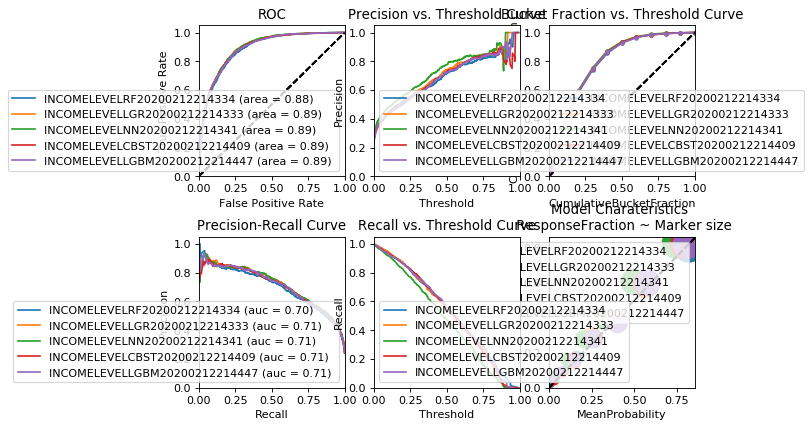

In [57]:
%matplotlib auto

RFModel.plot_eval_matrics(comparison=True)
LGRModel.plot_eval_matrics(comparison=True)
NNModel.plot_eval_matrics(comparison=True)
CBSTModel.plot_eval_matrics(comparison=True)
LGBMModel.plot_eval_matrics(comparison=True)

### Area Under Curve (AUC) Comparison

In [58]:
Models = [LGRModel, RFModel, CBSTModel, NNModel, LGBMModel]
ModelsComp = mltk.model_guages_comparison(Models)
ModelsComp.style.background_gradient(cmap='RdYlGn').set_precision(3)

,Model,PRC_AUC,ROC_AUC
0,INCOMELEVELLGR20200212214333,0.714,0.891
1,INCOMELEVELRF20200212214334,0.701,0.883
2,INCOMELEVELCBST20200212214409,0.706,0.888
3,INCOMELEVELNN20200212214341,0.714,0.892
4,INCOMELEVELLGBM20200212214447,0.708,0.887


### 7.2 Generate scores

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,0.0002,0.1,0.026,3121,84,0.479,0.0538,0.0269,1,1,0.24
2,0.1,0.2,0.145,804,114,0.123,0.073,0.142,0.521,0.946,0.435
3,0.2,0.3,0.251,608,179,0.0934,0.115,0.294,0.397,0.873,0.527
4,0.3,0.4,0.355,457,166,0.0702,0.106,0.363,0.304,0.758,0.598
5,0.401,0.499,0.454,375,167,0.0576,0.107,0.445,0.234,0.652,0.668
6,0.5,0.599,0.552,307,184,0.0471,0.118,0.599,0.176,0.545,0.741
7,0.601,0.7,0.653,233,159,0.0358,0.102,0.682,0.129,0.427,0.793
8,0.7,0.798,0.752,248,201,0.0381,0.129,0.81,0.0934,0.325,0.836
9,0.8,0.897,0.841,327,278,0.0502,0.178,0.85,0.0553,0.197,0.853


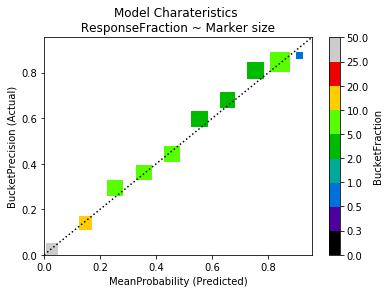

In [59]:
scoreVariable = LGRModel.get_score_variable()
scoreLabel = LGRModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, LGRModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

### 7.3 Confusion Matrix [actual, predicted]

### Confusion Matrix Terms
#### For a Binary Classifier
* TN= CF[0,0], FP= CF[0,1], FN= CF[1,0], TP= CF[1,1]
* Accuracy (ACC) = (TP+TN)/TOTAL
* Hit Rate, Sensitivity, Recall or True Positive Rate (TPR) = TP/(TP+FN)
* False Positive Rate (FPR) = FP/(FP+TN) 
* Specificity or True Negative Rate (TNR) = TN/(FP+TN)
* Miss Rate or False Negative rate (FNR) = FN/(FN+TP) 
* Positive Predictive Value or Precision (PPV) = TP/(TP+FP) 
* Harmonic Mean of Precision and Sensitivity or F1 score (F1) = 2TP/(2TP+FP+FN)

#### For a Multi-class Classifier
* TPS = Diagonal(CF)
* SUCCESS = Sum(TPS)
* Sum of Actual Conditions (ASUM) = RowSum(CF)
* Sum of Predicted conditions (PSUM) = ColumnsSum(CF)
* Positive Predictive Value or Precision for Class i (PPV[i]) = TPS[i]/PSUM
* Hit Rate, Sensitivity, Recall or True Positive Rate for Class i (TPR[i]) = TPS[i]/ASUM

##### References: 
* C. Beleites, R. Salzer, V. Sergo, Validation of soft classification models using partial class memberships: An extended concept of sensitivity & co. applied to grading of astrocytoma tissues, Chemometrics and Intelligent Laboratory Systems Volume 122, 15 March 2013, Pages 12-22. doi.org/10.1016/j.chemolab.2012.12.003.
* sklearn.metrics.confusion_matrix, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* Confusion Matrix, http://www2.cs.uregina.ca/~dbd/cs831/notes/ROC/ROC.html.




In [60]:
scoreVariable = LGRModel.get_score_variable()
scoreLabel = LGRModel.get_score_label()

threshold = 0.8
TestDataset = mltk.set_predicted_column(TestDataset, scoreVariable, threshold=threshold)
ConfusionMatrix = mltk.confusion_matrix(TestDataset, actual_variable=targetVariable, predcted_variable='Predicted', labels=[0,1], sample_weight=None, totals=True)
ConfusionMatrix.style.background_gradient(cmap='Greens').set_precision(3)  

In [61]:
scoreLabel

'Score'

### 7.3 Comparison of Models and Thresholds

#### Probabilty Threshold

6513/6513 [==============================] - ETA:  - 0s 6us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20200212214333_[TH=0.7],4852,100,1053,508,6513,608,5905,1561,4952,0.325,0.98,0.0202,0.675,0.836,0.823,0.468
1,INCOMELEVELLGR20200212214333_[TH=0.8],4899,53,1254,307,6513,360,6153,1561,4952,0.197,0.989,0.0107,0.803,0.853,0.799,0.32
2,INCOMELEVELLGR20200212214333_[TH=0.9],4948,4,1532,29,6513,33,6480,1561,4952,0.0186,0.999,0.000808,0.981,0.879,0.764,0.0364
3,INCOMELEVELRF20200212214334_[TH=0.7],4829,123,1066,495,6513,618,5895,1561,4952,0.317,0.975,0.0248,0.683,0.801,0.817,0.454
4,INCOMELEVELRF20200212214334_[TH=0.8],4890,62,1261,300,6513,362,6151,1561,4952,0.192,0.987,0.0125,0.808,0.829,0.797,0.312
5,INCOMELEVELRF20200212214334_[TH=0.9],4936,16,1444,117,6513,133,6380,1561,4952,0.075,0.997,0.00323,0.925,0.88,0.776,0.138
6,INCOMELEVELCBST20200212214409_[TH=0.7],4849,103,1065,496,6513,599,5914,1561,4952,0.318,0.979,0.0208,0.682,0.828,0.821,0.459
7,INCOMELEVELCBST20200212214409_[TH=0.8],4900,52,1273,288,6513,340,6173,1561,4952,0.184,0.989,0.0105,0.816,0.847,0.797,0.303
8,INCOMELEVELCBST20200212214409_[TH=0.9],4945,7,1534,27,6513,34,6479,1561,4952,0.0173,0.999,0.00141,0.983,0.794,0.763,0.0339
9,INCOMELEVELNN20200212214341_[TH=0.7],4885,67,1216,345,6513,412,6101,1561,4952,0.221,0.986,0.0135,0.779,0.837,0.803,0.35


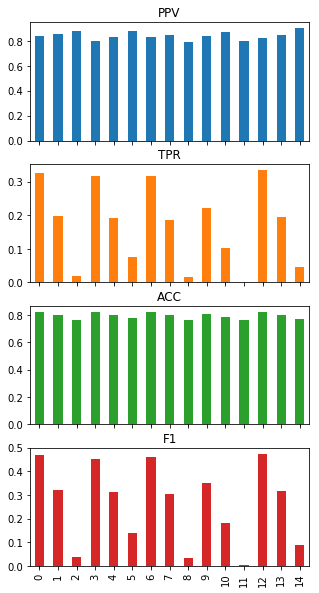

In [62]:
Models = [LGRModel, RFModel, CBSTModel, NNModel, LGBMModel]
thresholds=[0.7, 0.8, 0.9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=None, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)

#### Score (1-10) Threshold

6513/6513 [==============================] - ETA:  - 0s 6us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20200212214333_[TH=7],4852,100,1053,508,6513,608,5905,1561,4952,0.325,0.98,0.0202,0.675,0.836,0.823,0.468
1,INCOMELEVELLGR20200212214333_[TH=8],4899,53,1254,307,6513,360,6153,1561,4952,0.197,0.989,0.0107,0.803,0.853,0.799,0.32
2,INCOMELEVELLGR20200212214333_[TH=9],4948,4,1532,29,6513,33,6480,1561,4952,0.0186,0.999,0.000808,0.981,0.879,0.764,0.0364
3,INCOMELEVELRF20200212214334_[TH=7],4829,123,1066,495,6513,618,5895,1561,4952,0.317,0.975,0.0248,0.683,0.801,0.817,0.454
4,INCOMELEVELRF20200212214334_[TH=8],4890,62,1261,300,6513,362,6151,1561,4952,0.192,0.987,0.0125,0.808,0.829,0.797,0.312
5,INCOMELEVELRF20200212214334_[TH=9],4936,16,1444,117,6513,133,6380,1561,4952,0.075,0.997,0.00323,0.925,0.88,0.776,0.138
6,INCOMELEVELCBST20200212214409_[TH=7],4849,103,1065,496,6513,599,5914,1561,4952,0.318,0.979,0.0208,0.682,0.828,0.821,0.459
7,INCOMELEVELCBST20200212214409_[TH=8],4900,52,1273,288,6513,340,6173,1561,4952,0.184,0.989,0.0105,0.816,0.847,0.797,0.303
8,INCOMELEVELCBST20200212214409_[TH=9],4945,7,1534,27,6513,34,6479,1561,4952,0.0173,0.999,0.00141,0.983,0.794,0.763,0.0339
9,INCOMELEVELNN20200212214341_[TH=7],4885,67,1216,345,6513,412,6101,1561,4952,0.221,0.986,0.0135,0.779,0.837,0.803,0.35


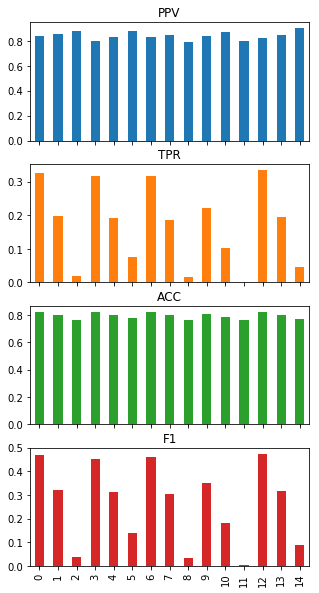

In [64]:
Models = [LGRModel, RFModel, CBSTModel, NNModel, LGBMModel]
thresholds=[7, 8, 9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=scoreLabel, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)


### 7.4 Set Custom Score Edges

### Re-bin quantiles

ROC AUC 0.8829087232305212
PRC AUC 0.7009954320366634


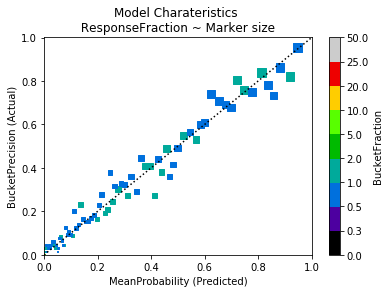

In [65]:
SelectModel = RFModel #LGRModel

scoreVariable = SelectModel.get_score_variable()
scoreLabel = SelectModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)

RobustnessTable, ROCCurve, PrecisionRecallCurve, roc_auc, prc_auc = mltk.model_performance_matrics(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable, quantile_label='Quantile',  quantiles=100, show_plot=True)
print('ROC AUC', roc_auc)
print('PRC AUC', prc_auc)

In [66]:
quantiles=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
edges, threshold = mltk.get_score_cutoffs(ResultsSet=TestDataset, quantiles=quantiles, target_variable=targetVariable, score_variable=scoreVariable)
print('Threshold', threshold)
print('Edges', edges)

Threshold 0.4195
Edges [0.0, 0.0005, 0.0071, 0.024, 0.0598, 0.1151, 0.2106, 0.3155, 0.4739, 0.6885, inf]


,MeanProbability,BucketPrecision,BucketCount,ResponseCount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,
1,0.001,0.0071,1129,8,1,1,0.24
2,0.0079,0.0169,415,7,0.827,0.995,0.288
3,0.0177,0.027,445,12,0.763,0.99,0.311
4,0.0382,0.0363,524,19,0.695,0.983,0.339
5,0.0804,0.0823,717,59,0.614,0.971,0.379
6,0.153,0.177,587,104,0.504,0.933,0.444
7,0.251,0.262,699,183,0.414,0.866,0.501
8,0.386,0.378,614,232,0.307,0.749,0.585
9,0.557,0.563,696,392,0.212,0.6,0.677


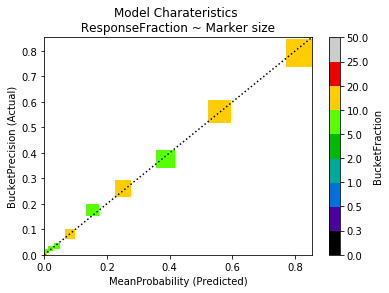

In [67]:
# Adjest or keep edge values
edges = [0.0, 0.0048, 0.0118, 0.0251, 0.0533, 0.1115, 0.1988, 0.3091, 0.4615, 0.6775, 1.0]
SelectModel.set_score_edges(edges)

# update threshold value
#SelectModel.set_predict_threshold(threshold)

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, condensed=True, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

In [68]:
SelectModel.get_model_manifest()

{'model_attributes': {'ModelID': 'INCOMELEVELRF20200212214334',
  'ModelType': 'classification',
  'EnumerationType': 'binary',
  'ModelName': 'IncomeLevel',
  'Version': '0.1',
  'TrainingMethod': 'supervised',
  'MLTKVersion': '0.1.11',
  'BuiltTime': '20200212214334',
  'ModelFitTime': 5.117759700000001,
  'MLTool': 'sklearn=0.21.1'},
 'model_parameters': {'MLAlgorithm': 'RF',
  'Verbose': True,
  'NTrees': 500,
  'MaxDepth': 50,
  'MinSamplesToSplit': 10,
  'Processors': 2,
  'NumClasses': 2},
 'score_parameters': {'Edges': [0.0,
   0.0048,
   0.0118,
   0.0251,
   0.0533,
   0.1115,
   0.1988,
   0.3091,
   0.4615,
   0.6775,
   1.0],
  'Percentiles': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0],
  'Threshold': 0.5,
  'Quantiles': 10,
  'TargetClass': '>50K',
  'ScoreVariable': 'Probability',
  'ScoreLabel': 'Score',
  'QuantileLabel': 'Quantile',
  'PredictedLabel': 'Predicted'},
 'sample_attributes': {'SampleDescription': 'Adult Census Income Dataset',
  'NumClasses': 

### 7.5 Save Models

In [69]:
saveFilePath = '{}.pkl'.format(SelectModel.get_model_id())
mltk.save_model(SelectModel, saveFilePath)

Saving model to file INCOMELEVELRF20200212214334.pkl


## 8. Generate Predicted Value (Score) <a class="anchor" id="deploy"></a>
[^](#toc) 

### 8.1 Define ETL Function

In [70]:
def ETL(DataFrame, variables_setup_dict=None):
    # Add ID column
    DataFrame = mltk.add_identity_column(DataFrame, id_label='ID', start=1, increment=1)
    
    # Clean column names
    DataFrame = mltk.clean_column_names(DataFrame, replace='')
    input_columns = list(DataFrame.columns)

    variables_setup_dict = """   
    {
        "setting":"score",

        "variables": {            
                "category_variables" : ["sex", "race", "occupation", "workclass", "maritalstatus", "relationship"],
                "binary_variables": [],
                "target_variable":"HighIncome"
        },

        "preprocess_tasks": [
            {
                "type": "transform",
                "out_type":"cnt",
                "include": false,
                "operation": "normalize",
                "variables": {
                    "source": "age",
                    "destination": "normalizedage"
                },
                "parameters": {
                    "method": "zscore"
                }
            },
            {
                "type": "category_merge",
                "out_type":"cat",
                "include": true,
                "operation": "catmerge",
                "variables": {
                    "source": "maritalstatus",
                    "destination": "maritalstatus"
                },
                "parameters": {
                    "group_value": "Married",
                    "values": [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" ]
                }
            },
            {
                "type": "entity",
                "out_type":"cat",
                "include": true,
                "operation": "dictionary",
                "variables": {
                    "source": "nativecountry",
                    "destination": "nativecountryGRP"
                },
                "parameters": {
                    "match_type": null,
                    "dictionary": [
                        {
                            "entity": "USA",
                            "values": [ "United-States" ],
                            "case": true
                        },
                        {
                            "entity": "Canada",
                            "values": [ "Canada" ],
                            "case": true
                        },
                        {
                            "entity": "OtherAmericas",
                            "values": [ "South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                            "case": true
                        },
                        {
                            "entity": "Europe-Med",
                            "values": [ "Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal" ],
                            "case": true
                        },
                        {
                            "entity": "Asia",
                            "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand" ],
                            "case": true
                        },
                        {
                            "entity": "Other",
                            "values": [ "?" ],
                            "case": true
                        }
                    ],
                    "null": "NA",
                    "default": "OTHER"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "age",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "30", "40", "50", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "educationnum",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "1", "5", "8", "9", "12", "16" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "hoursperweek",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "35", "40", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            }
        ]
    }
    """
    
    DataFrame, categoryVariables, binaryVariables, targetVariable = mltk.setup_variables_task(DataFrame, variables_setup_dict)
    
    # Create One Hot Encoded Variables
    DataFrame, featureVariables, targetVariable = mltk.to_one_hot_encode(DataFrame, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)

    return DataFrame, input_columns

### 8.2 Load Model Object and Input Data

In [71]:
MLModelObject = mltk.load_model(saveFilePath)

TestInput = """
{
      "ID": "A001",
      "age": 32,
      "workclass": "Private",
      "education": "Doctorate",
      "education-num": 16,
      "marital-status": "Married-civ-spouse",
      "occupation": "Prof-specialty",
      "relationship": "Husband",
      "race": "Asian-Pac-Islander",
      "sex": "Male",
      "capital-gain": 0,
      "capital-loss": 0,
      "hours-per-week": 40,
      "native-country": "?"
}
"""

Loading model from file INCOMELEVELRF20200212214334.pkl


### 8.3 Generate Scores

In [72]:
output = mltk.score_records(TestInput, MLModelObject, edges=None, ETL=ETL, return_type='dict') # Other options for return_type, {'json', 'frame'}
output[0]

Column ID exists in the DataFrame


{'ID': 'A001',
 'age': 32,
 'capitalgain': 0,
 'capitalloss': 0,
 'education': 'Doctorate',
 'educationnum': 16,
 'hoursperweek': 40,
 'maritalstatus': 'Married',
 'nativecountry': '?',
 'occupation': 'Prof-specialty',
 'race': 'Asian-Pac-Islander',
 'relationship': 'Husband',
 'sex': 'Male',
 'workclass': 'Private',
 'Probability': 0.5212809102490217,
 'Score': 9,
 'Predicted': 1}

## 9. Explain Model Output (LIME/SHAP)  <a class="anchor" id="explain"></a>
[^](#toc) 

In [73]:
DataFrame = TestDataset.sample(1)
DataFrame

,ID,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income,HighIncome,HighIncome2,EXCLUDE,normalizedage,__count__,nativecountryGRP,ageGRP,educationnumGRP,hoursperweekGRP,testdistane,teststringindex,maritalstatusCNT,"educationnumGRP_1_(1,5]","educationnumGRP_2_(5,8]","educationnumGRP_3_(8,9]","educationnumGRP_4_(9,12]","educationnumGRP_5_(12,16]",maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Never-married,maritalstatus_Separated,maritalstatus_Widowed,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,"hoursperweekGRP_1_(0,20]","hoursperweekGRP_2_(20,35]","hoursperweekGRP_3_(35,40]","hoursperweekGRP_4_(40,60]","hoursperweekGRP_5_(60,INF)",workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male,nativecountryGRP_Asia,nativecountryGRP_Canada,nativecountryGRP_Europe-Med,nativecountryGRP_Other,nativecountryGRP_OtherAmericas,nativecountryGRP_USA,"ageGRP_1_(0,20]","ageGRP_2_(20,30]","ageGRP_3_(30,40]","ageGRP_4_(40,50]","ageGRP_5_(50,60]","ageGRP_6_(60,INF)",Probability,Quantile,Probability_0,Probability_1,Score,Predicted,rank,quantile
25636,25637,29,Private,192283,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,20,United-States,<=50K,0,0,0,-0.70244,1,USA,"2_(20,30]","4_(9,12]","1_(0,20]",0.71429,0.05618,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.00081,4,0.99919,0.00081,1,0,708.0,"(0.999, 4952.24]"


## Build and Save Explainer

In [74]:
Explainer = mltk.build_explainer(MLModelObject, explainer_config={'IdColumns':['ID'], 'Method':'shap', 'ClassNumber':1, 'FillMissing':0})

Explainer created ...


In [75]:
save_file_path = '{}_Explainer.pkl'.format(MLModelObject.get_model_id())
mltk.save_explainer(Explainer, save_file_path)

Saving explainer to file INCOMELEVELRF20200212214334_Explainer.pkl


In [76]:
Explainer = mltk.load_explainer(save_file_path) # Test load ...

Loading explainer from file INCOMELEVELRF20200212214334_Explainer.pkl


## Explain Record

In [77]:
ImpactValues, VariableValues = mltk.get_explainer_values_task(DataFrame, Explainer=Explainer)

### Using Shap Library force_plot

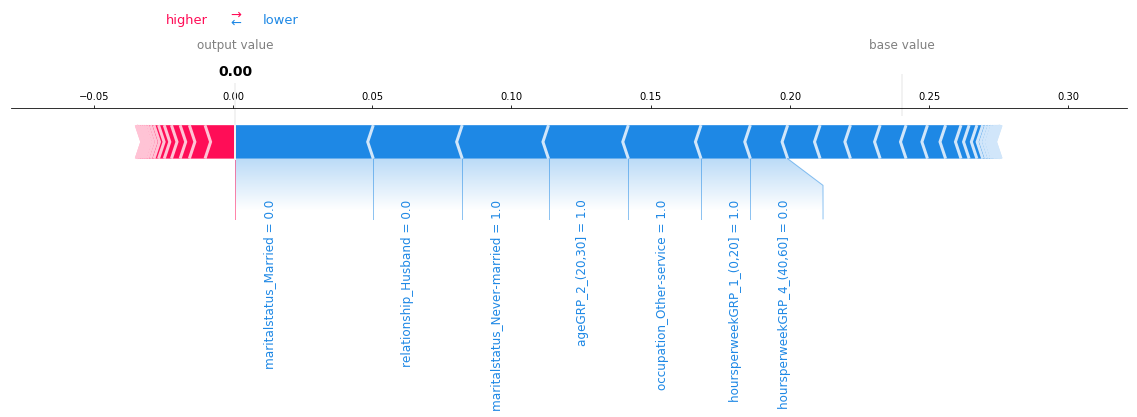

In [78]:
explainer_visual = mltk.get_explainer_visual(ImpactValues, VariableValues, Explainer, visual_config={'figsize':[20,4], 'text_rotation':90})

### Generate Variable Impact Summary

sum_posivite_impact_values 0.03555026850916806
sum_negative_impact_values -0.27502524756638663


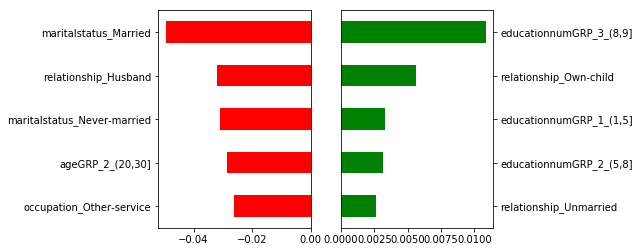

In [79]:
explainer_summary = mltk.get_shap_impact_summary(ImpactValues, VariableValues, Explainer.get_model_variables(), iloc=0, top_n=5, show_plot=True)

sum_posivite_impact_values 0.03555026850916806
sum_negative_impact_values -0.27502524756638663


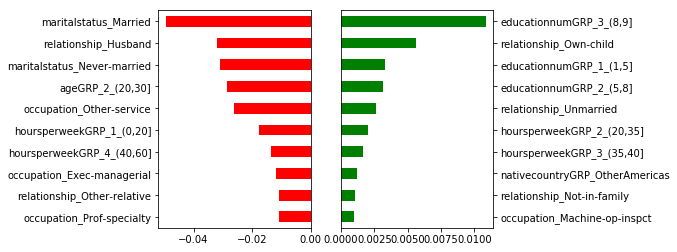

In [80]:
explainer_report, explain_plot = mltk.get_explainer_report(DataFrame, Explainer, top_n=10, show_plot=True, return_type='frame')

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for Unifying End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.11"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 01, 2018; Last Update: December 07, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)